#### Table of Contents
    1. Notebook SetUp
    2. Data Cleaning
    3. Data prep for regression analysis 
    4. Regression analysis
    5. Export

# 1. SetUp

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# File Pathway

path = r'/Volumes/RAID Volume/Data Analytics/6 Advanced Analytics & Dashboard Design/11-2022 World Happiness Report'

In [4]:
# Import Dataset

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'happy_clean2.pkl'))

In [5]:
df.columns

Index(['Country', 'Region', 'Year', 'Happiness Rank', 'Happiness Score',
       'Economy GDP per Capita', 'Family Social Support',
       'Health Life Expectancy', 'Freedom to Make Choices',
       'Perceptions of Corruption', 'Generosity', 'Population 2020',
       'Population 2019', 'COVID-19 deaths per 100,000 population in 2020',
       'Happiness Category'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         1157 non-null   object 
 1   Region                                          1157 non-null   object 
 2   Year                                            1157 non-null   int64  
 3   Happiness Rank                                  1157 non-null   int64  
 4   Happiness Score                                 1157 non-null   float64
 5   Economy GDP per Capita                          1157 non-null   float64
 6   Family Social Support                           1157 non-null   float64
 7   Health Life Expectancy                          1157 non-null   float64
 8   Freedom to Make Choices                         1157 non-null   float64
 9   Perceptions of Corruption                

# 2. Data Cleaning

In [7]:
# Rename column

df.rename(columns = {'COVID-19 deaths per 100,000 population in 2020' : 'Covid_Deaths'}, inplace = True)

In [8]:
# Create Post-Covid data subset
# Create Covid flag

df.loc[df['Year'] < 2020, 'Covid Status'] = 'Pre'
df.loc[df['Year'] >= 2020, 'Covid Status'] = 'Post'

In [9]:
df['Covid Status'].value_counts(dropna = False)

Pre     717
Post    440
Name: Covid Status, dtype: int64

In [10]:
# Create Post-Covid data subset

df_covid = df[df['Covid Status'] == 'Post']

In [11]:
# Check for missing values

df_covid.isnull().sum()

Country                      0
Region                       0
Year                         0
Happiness Rank               0
Happiness Score              0
Economy GDP per Capita       0
Family Social Support        0
Health Life Expectancy       0
Freedom to Make Choices      0
Perceptions of Corruption    0
Generosity                   0
Population 2020              0
Population 2019              0
Covid_Deaths                 0
Happiness Category           0
Covid Status                 0
dtype: int64

In [12]:
# Check for Dups

dups = df_covid.duplicated()

In [13]:
dups.shape # No dups

(440,)

/var/folders/kw/531kzq5s3tzgnh8894mlk_5w0000gn/T/ipykernel_43479/1855940450.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_covid['Happiness Score'], bins=10)


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

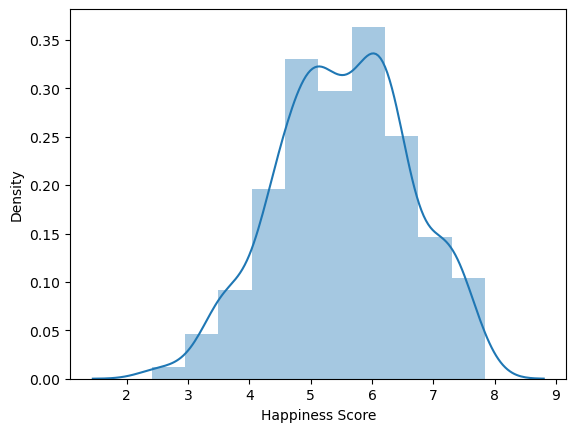

In [14]:
# Check for extreme values

sns.distplot(df_covid['Happiness Score'], bins=10) 

# 3. Data prep for regression analysis 

### Hypothesis
#### - lf a greater than number of Covid deaths, then greatful and happier to be alive.

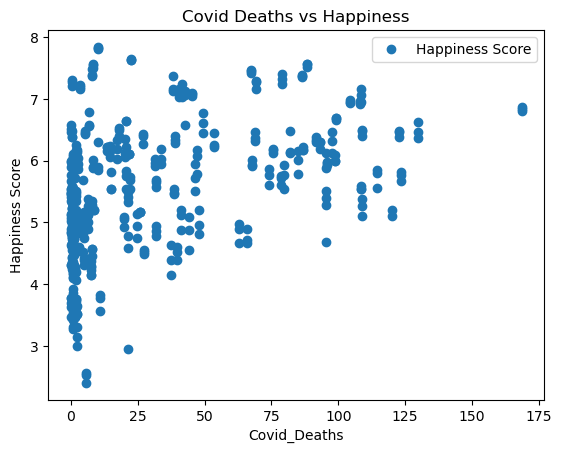

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_covid.plot(x = 'Covid_Deaths', y='Happiness Score',style='o')
plt.title('Covid Deaths vs Happiness')  
plt.xlabel('Covid_Deaths')  
plt.ylabel('Happiness Score')  
plt.show()

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_covid['Covid_Deaths'].values.reshape(-1,1)
y = df_covid['Happiness Score'].values.reshape(-1,1)

In [17]:
X

array([[5.62800e+00],
       [5.62800e+00],
       [5.62800e+00],
       [4.10380e+01],
       [4.10380e+01],
       [4.10380e+01],
       [6.28500e+00],
       [6.28500e+00],
       [6.28500e+00],
       [9.56840e+01],
       [9.56840e+01],
       [9.56840e+01],
       [9.52680e+01],
       [9.52680e+01],
       [9.52680e+01],
       [3.56500e+00],
       [3.56500e+00],
       [3.56500e+00],
       [6.90840e+01],
       [6.90840e+01],
       [6.90840e+01],
       [2.60480e+01],
       [2.60480e+01],
       [2.60480e+01],
       [2.06870e+01],
       [2.06870e+01],
       [2.06870e+01],
       [4.59000e+00],
       [4.59000e+00],
       [4.59000e+00],
       [1.50700e+01],
       [1.50700e+01],
       [1.50700e+01],
       [1.68496e+02],
       [1.68496e+02],
       [1.68496e+02],
       [3.63000e-01],
       [3.63000e-01],
       [3.63000e-01],
       [7.85140e+01],
       [7.85140e+01],
       [7.85140e+01],
       [1.23445e+02],
       [1.23445e+02],
       [1.23445e+02],
       [1.

In [18]:
y

array([[2.567],
       [2.523],
       [2.404],
       [4.883],
       [5.117],
       [5.199],
       [5.005],
       [4.887],
       [5.122],
       [5.975],
       [5.929],
       [5.967],
       [4.677],
       [5.283],
       [5.399],
       [7.223],
       [7.183],
       [7.162],
       [7.294],
       [7.268],
       [7.163],
       [5.165],
       [5.171],
       [5.173],
       [6.227],
       [6.647],
       [6.647],
       [4.833],
       [5.025],
       [5.155],
       [5.54 ],
       [5.534],
       [5.821],
       [6.864],
       [6.834],
       [6.805],
       [5.216],
       [5.045],
       [4.623],
       [5.747],
       [5.716],
       [5.6  ],
       [5.674],
       [5.813],
       [5.768],
       [3.479],
       [3.467],
       [3.471],
       [6.376],
       [6.33 ],
       [6.293],
       [5.102],
       [5.266],
       [5.371],
       [4.769],
       [4.834],
       [4.67 ],
       [3.775],
       [3.775],
       [4.848],
       [4.83 ],
       [4.64 ],
       [

In [19]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [20]:
# Create regression object

regression = LinearRegression()

In [21]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

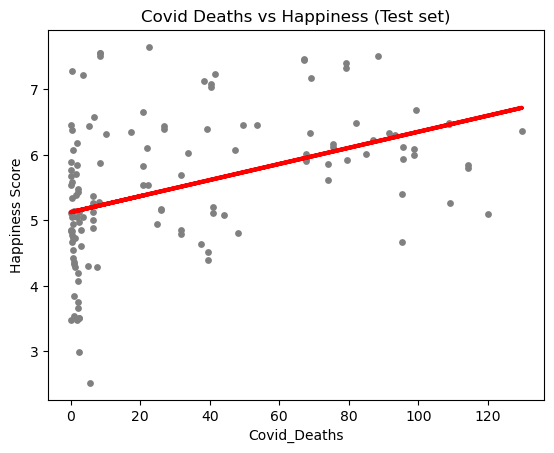

In [23]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Covid Deaths vs Happiness (Test set)')
plot_test.xlabel('Covid_Deaths')
plot_test.ylabel('Happiness Score')
plot_test.show()

#### The data and the line don't fit together very well. The distance between the data points and the line will demonstrate this, proving that the relationship between the variables is not linear.

In [24]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [25]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01226738]]
Mean squared error:  0.9467252153626599
R2 score:  0.1645531461316322


In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.828,5.378121
1,3.849,5.135030
2,6.447,5.731789
3,5.840,6.525243
4,4.769,5.128332
5,4.677,6.292028
6,7.554,5.227588
7,7.464,5.948443
8,4.308,5.183806
9,5.797,6.525243


#### The model's summary statistics support the assertion that it is inaccurate. A very poor fit is indicated by an R2 value of 0.16, and the huge MSE (for a tiny dataset) further supports this. The discrepancy between actual and expected values can also be used to demonstrate this.

#### It's vital to take note of the tiny size of the data set, which may cause data bias. Only 150 countries over the past three years are being examined.

# 5. Export

In [28]:
# Export the dataset with renamed column and flag

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'happy_clean3.pkl'))